In [70]:
import keras

In [71]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [72]:
def encode(seq):
    n = len(seq)
    l = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            if((seq[i] == 'A' and seq[j] == 'U') or (seq[j] == 'A' and seq[i] == 'U')):
                l[i][j] = 2
            elif((seq[i] == 'G' and seq[j] == 'C') or (seq[j] == 'G' and seq[i] == 'C')):
                l[i][j] = 3
            elif((seq[i] == 'G' and seq[j] == 'U') or (seq[j] == 'U' and seq[i] == 'G')):
                l[i][j] = 0.8
            else:
                l[i][j] = 0
    return l

In [73]:
import numpy as np
import math

def Gaussian(x):
    return math.exp(-0.5*(x*x))

def matrix_calc(data, sliding_param):
    mat = np.zeros([len(data)+sliding_param,len(data)])
    for i in range(len(data[0])):
        for j in range(len(data[0])):
            coefficient = 0
            for add in range(30):
                if i - add >= 0 and j + add <len(data):
                    score = data[i-add][j+add]
                    if score == 0:
                        break
                    else:
                        coefficient = coefficient + score * Gaussian(add)
                else:
                    break
            if coefficient > 0:
                for add in range(1,30):
                    if i + add < len(data) and j - add >= 0:
                        score = data[i+add][j-add]
                        if score == 0:
                            break
                        else:
                            coefficient = coefficient + score * Gaussian(add)
                    else:
                        break
            mat[[i+int(sliding_param/2)],[j]] = coefficient
    return mat

def slidingWindow(numpy_M, sliding_param, n):
    zeros = np.zeros((sliding_param, n), dtype=int)
    numpy_M = np.append(numpy_M, zeros, axis=0)
    sliding_mats = [numpy_M[i: i + sliding_param, :].tolist() for i in range(n)]
    return sliding_mats

In [74]:
print(encode("ACUGGGAUAAAA"))
x = slidingWindow(matrix_calc(encode("ACUGGGAUAAAA"), 3), 3, 12)

[[0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2], [0, 3, 0.8, 0, 0, 0, 0, 0.8, 0, 0, 0, 0], [0, 3, 0.8, 0, 0, 0, 0, 0.8, 0, 0, 0, 0], [0, 3, 0.8, 0, 0, 0, 0, 0.8, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2], [0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0]]


In [75]:
def extractFromText(file):
    f = open(file, "r")
    lines = f.readlines()
    seq = lines[3].strip()
    dbn = lines[4]
    dots = [[0 for i in range(3)] for j in range(len(dbn))]
    for i in range(len(dbn)):
        if(dbn[i] == '('):
            dots[i][0] = 1
            dots[i][1] = 0
            dots[i][2] = 0
        elif(dbn[i] == ')'):
            dots[i][0] = 0
            dots[i][1] = 1
            dots[i][2] = 0
        else:
            dots[i][0] = 0
            dots[i][1] = 0
            dots[i][2] = 1
    return seq, np.array(dots)
    
            
def scale(im, nR, nC):
    nR0 = len(im) 
    nC0 = len(im[0]) 
    arr =  [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  
             for c in range(nC)] for r in range(nR)]
    return np.array(arr)

    

In [76]:
x = extractFromText(r"C:\Users\sidsr\Downloads\dbnFiles\dbnFiles\bpRNA_CRW_4300.dbn")
print(x)
for i in x[1]:
    print(i)

('GGGUGAGUACAAAGGAAGCGUCCGUUCCUUGAGAACUCAACAGCGUGCCAAAAGUCAACGCCAGAUAUGUUGAUACCCCGACCUGAUCGGAUCUCCGUUCGGGUUGAGGUUCCUUUGAAGUAACACAACAGCGAGGACGCUGUGAACGGUCGGAUUAUUCCUCCGACUGUUCCGCUCUCGUGGUGUCACCCGAUUACGGGUAUACAUUCACGGAGAGUUUGAUCCUGGCUCAGGACGAACGCUGGCGGCGUGCUUAACACAUGCAAGUCGAACGAUGAACCACUUCGGUGGGGAUUAGUGGCGAACGGGUGAGUAACACGUGGGCAAUCUGCCCUUCACUCUGGGACAAGCCCUGGAAACGGGGUCUAAUACCGGAUACUGACCCUCGCAGGCAUCUGCGAGGUUCGAAAGCUCCGGCGGUGAAGGAUGAGCCCGCGGCCUAUCAGCUUGUUGGUGAGGUAAUGGCUCACCAAGGCGACGACGGGUAGCCGGCCUGAGAGGGCGACCGGCCACACUGGGACUGAGACACGGCCCAGACUCCUACGGGAGGCAGCAGUGGGGAAUAUUGCACAAUGGGCGAAAGCCUGAUGCAGCGACGCCGCGUGAGGGAUGACGGCCUUCGGGUUGUAAACCUCUUUCAGCAGGGAAGAAGCGAAAGUGACGGUACCUGCAGAAGAAGCGCCGGCUAACUACGUGCCAGCAGCCGCGGUAAUACGUAGGGCGCAAGCGUUGUCCGGAAUUAUUGGGCGUAAAGAGCUCGUAGGCGGCUUGUCACGUCGGUUGUGAAAGCCCGGGGCUUAACCCCGGGUCUGCAGUCGAUACGGGCAGGCUAGAGUUCGGUAGGGGAGAUCGGAAUUCCUGGUGUAGCGGUGAAAUGCGCAGAUAUCAGGAGGAACACCGGUGGCGAAGGCGGAUCUCUGGGCCGAUACUGACGCUGAGGAGCGAAAGCGUGGGGAGCGAACAGGAUUAGAUACCCUGGUAGUCCACGCCGUAAACGG

In [116]:
training_data = np.zeros(shape=(200000, 19, 120))
training_labels = np.zeros(shape=(200000, 3))

import os
path = r"C:\Users\sidsr\Downloads\dbnFiles\dbnFiles"
files = os.listdir(path)

print(training_labels.shape)
train_counter = 0
sum = 0
for i in range(100000, 101000):
    x = extractFromText(path+"\\"+files[i])
    seq = x[0]
    windows = slidingWindow(matrix_calc(encode(seq), 19), 19, len(seq))
    sum +=len(seq)
    for j in range(len(seq)):
        training_data[train_counter] = scale(windows[j], 19, 120)
        training_labels[train_counter] = x[1][j]
        train_counter+=1
print(sum, sum/1000)


(200000, 3)
119528 119.528


In [117]:
print(train_counter)

119528


In [118]:
training_data = training_data[:train_counter]
training_labels = training_labels[:train_counter]

In [119]:
np.save("train_data", training_data)
np.save("train_label", training_labels)

In [81]:
training_data = np.load("train_data.npy")
training_labels = np.load("train_label.npy")

In [154]:
model = keras.Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, input_shape=(19,  120, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (3, 3), padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (3, 3), padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (3, 3), padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [155]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 19, 120, 64)       640       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 7, 40, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 40, 64)         0         
                                                                 
 conv2d_58 (Conv2D)          (None, 7, 40, 64)         36928     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 3, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 3, 14, 64)       

In [156]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [157]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training_data, training_labels, test_size=0.3, random_state = 42)

In [158]:
batch_size = 256
epochs = 50
print(training_data.shape)
print(training_labels.shape)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),  verbose=1)

(119528, 19, 120)
(119528, 3)
Epoch 1/50
327/327 [==============================] - 219s 661ms/step - loss: 1.0002 - accuracy: 0.4762 - val_loss: 0.9041 - val_accuracy: 0.5356
Epoch 2/50
327/327 [==============================] - 207s 633ms/step - loss: 0.8828 - accuracy: 0.5510 - val_loss: 0.8137 - val_accuracy: 0.5888
Epoch 3/50
327/327 [==============================] - 201s 614ms/step - loss: 0.8162 - accuracy: 0.5945 - val_loss: 0.7614 - val_accuracy: 0.6381
Epoch 4/50
327/327 [==============================] - 199s 608ms/step - loss: 0.7740 - accuracy: 0.6228 - val_loss: 0.7215 - val_accuracy: 0.6635
Epoch 5/50
327/327 [==============================] - 214s 655ms/step - loss: 0.7393 - accuracy: 0.6438 - val_loss: 0.6810 - val_accuracy: 0.6797
Epoch 6/50
327/327 [==============================] - 211s 646ms/step - loss: 0.7125 - accuracy: 0.6627 - val_loss: 0.6452 - val_accuracy: 0.7062
Epoch 7/50
327/327 [==============================] - 210s 642ms/step - loss: 0.6883 - accurac

In [159]:
model.save('82.h5')

In [160]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


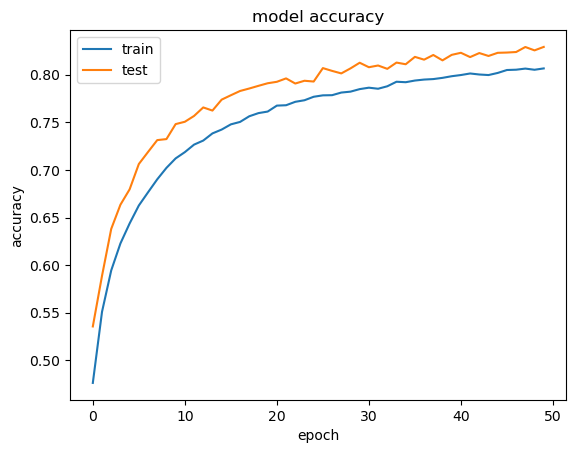

In [161]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

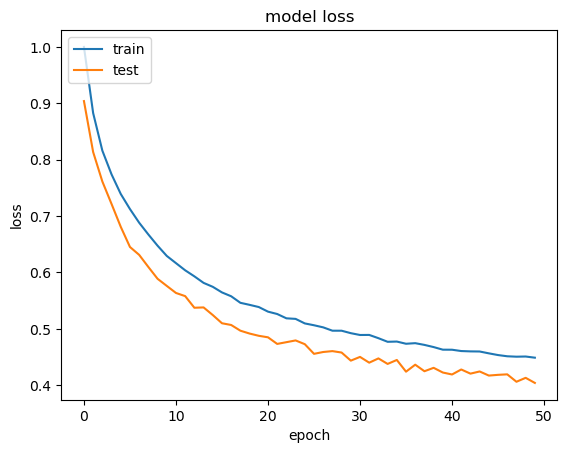

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()